# **Física Computacional: _Aula Virtual 2_**
#### $\circ$ Arvizu Velázquez Arturo Alejandro 
#### $\circ$ Briones Andrade Joshua

##### **Fecha de entrega: _4 de diciembre_**
-------

In [ ]:
# Primero importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd
pd.options.display.float_format = '{:.14f}'.format

Importamos todos los métodos que conocemos: Incremental Search, Biseccion, Newton-Rapson, Secante y Ridders.

In [ ]:
def incremental(f,a,b,dx):
    x0=a;f0=f(x0) 
    x1=x0+dx;f1=f(x1) 
    contador=0.0 
    while f0*f1>0.0:
        if x1>=b: break
        x0=x1;f0=f1
        x1=x0+dx;f1=f(x1)
        contador=contador+1
    return [x1,contador] 

In [ ]:
def biseccion(f,a,b,epsilon):
    contador=0
    dx=abs(b-a)
    while dx>epsilon:
        x=(a+b)/2.0
        if (f(a)*f(x))<0:
            b=x 
        else:
            a=x 
        dx=abs(b-a) 
        contador=contador+1
    return [x, contador]

In [ ]:
def newton(f,df,a,b,epsilon):
    dx=2*epsilon
    contador = 0
    x=0.5*(a+b)
    while dx> epsilon and contador<1000:
        x1=x-f(x)/df(x)
        dx=abs(x-x1)
        x=x1
        contador=contador+1
    return [x,contador]

In [ ]:
def secante(f, x0, x1, delta):
    f0 = f(x0)
    f1 = f(x1)
    contador = 0
    res = [[x0, f(x0), np.nan], 
           [x1, f(x1), x1 - x0],]
    while True:
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        f2 = f(x2)
        res.append([x2, f2, x2-x1])
        if abs(f2) < delta:
            break 
        f0 = f1
        f1 = f2
        x0 = x1
        x1 = x2
        contador=contador+1
    return [x0,contador]

In [ ]:
def ridders(f,x1,x2,tol):
    n=0
    f1=f(x1)
    if f1==0: return x1
    f2=f(x2)
    if f2==0: return x2
   # if f1*f2>0.0: return np.nan #intervalos correctos
    while abs(x1-x2)> tol:
        x3=0.5*(x1+x2);f3=f(x3)
        raiz=sqrt(abs(3**2.-f1*f2))
        if raiz==0:return None
        fraccion=(x3-x1)*f3/raiz
        if (f1-f2)<0.0: fraccion=-fraccion
        x4=x3+fraccion; f4=f(x4)
        if (f3*f4)>0.0:
            if f1*f4>0.0:x1=x3;f1=f3
            else: x2=x3;f2=f3
        else:             
            x1=x3;x2=x4;f1=f3;f2=f4
        n+=1
    return [x4,n]

### **1. Evaluando nuestros métodos**

Encuentra las raíces de los siguientes polinomios con todos los métodos que conocemos.
Para cada caso, explica cual es el mejor método y cuál es el peor.

Entonces, para hacer este proceso justo y ver qué metodo conviene más, consideramos la misma tolerancia(o parámetros análogos) para todos los metodos y juzgamos apartir de cuántos pasos tuvieron que computarse para llegar a un resultado y la diferencia porcentual entre el valor computado y el valor obtenido.



i) Encuentra las dos raíces de $f(x)=2x^5+5x-3=0$

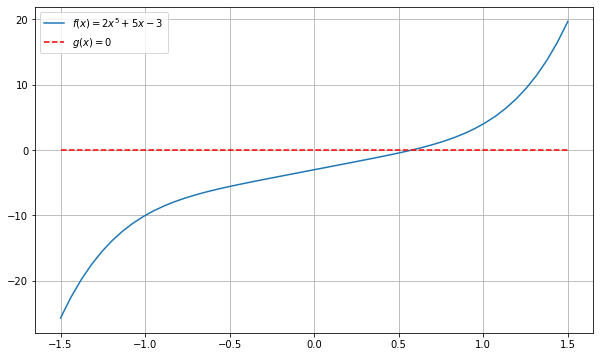

In [ ]:
# Gráficamos para poder ver el comportamiento de la función
x = np.linspace(-1.5,1.5); f = lambda x: 2*x**5 + 5*x-3
y = f(x)
plt.figure(figsize=(10,6)); plt.grid()
plt.plot(x,y, label="$f(x)=2x^5 + 5x-3$"); plt.plot(x,y*0, "r--", label="$g(x)=0$")
plt.legend()
plt.show()

Debido a que $f(x)=2x^5-+5x-3$ tiene cinco raíces diferentes por ser un polinomio de grado 5, al calcularlas en Mathematica se tiene que 

$$x_1= 0.574883,\quad x_2=-1.01137-(0.906579)i,\quad x_3=-1.01137+(0.906579)i,$$
$$x_4 =0.723933\,-(0.943565) i,\quad x_5=0.723933\, +(0.943565) i$$

entonces solo podemos aproximar a la raiz $x_1$ dado que estamos trabajando en el dominio de los reales con estos métodos. Además, siguiendo la gráfica podemos trabajar dentro del intervalo $[0,1]$ para determinar más fácilmente el valor de la raíz.

In [ ]:
f1 = lambda x: 2*x**5 + 5*x-3
df1= lambda x: 10*x**4 + 5

#Para la raíz en [0,1]
rm1=[incremental(f1,0.0,1.0,1e-4)[0],biseccion(f1,0.0,1.0,1e-4)[0],newton(f1,df1,0.0,1.0,1e-4)[0],secante(f1,0.0,1.0,1e-4)[0],ridders(f1,0.0,1.0,1e-4)[0]]
rm2=[incremental(f1,0.0,1.0,1e-4)[1],biseccion(f1,0.0,1.0,1e-4)[1],newton(f1,df1,0.0,1.0,1e-4)[1],secante(f1,0.0,1.0,1e-4)[1],ridders(f1,0.0,1.0,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 0.57488349568386
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,0.57489999999995,5748,0.00287089753262
biseccion,0.57489013671875,14,0.00115519665112
newton,0.57488349570111,3,0.00000000300068
secante,0.57830870980949,4,0.59581013393966
ridders,0.57489013589561,14,0.00115505346737


En este caso el **mejor método** es **Newton** con un error de $3\times 10^{-9}$ y solo en tres pasos. Esto es porque los polinomios son derivables, suaves y continuos en todas sus partes.

El **peor método** sería **Incremental** ya que necesita 5748 pasos para tener un error de $2.87\times 10^{-3}$, lo cual es bastante costoso en términos de tiempo de computo comparado con los otros métodos.

ii) $f(x)=\cos(x)+(1+x^2)^{-1}$


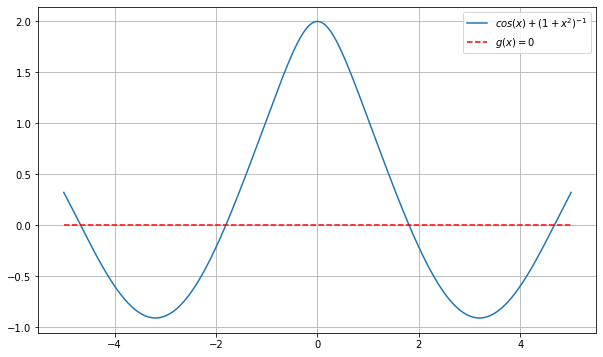

In [ ]:
x = np.linspace(-5.0,5.0,1000); f2 = lambda x: np.cos(x)+(1+x**2)**(-1)
y = f2(x)
plt.figure(figsize=(10,6)); plt.grid()
plt.plot(x,y, label="$cos(x)+(1+x^2)^{-1}$"); plt.plot(x,y*0, "r--", label="$g(x)=0$")
plt.legend()
plt.show()

Como $f(x)=\cos(x)+(1+x^2)^{-1}$ tiene un numero infinito de raíces, solo escogeremos las dos primeras raíces más cercanas al origen, ubicadas en los intervalos [-2.0,-1.0] y [1.0,2.0].

Y de acuerdo con Wolfram Alpha, la ecuación, para los intervalos mencionados, tiene soluciones: $x_{\pm}=\pm 1.80737537918248$

In [ ]:
f2 = lambda x: np.cos(x)+(1+x**2)**(-1)
df2= lambda x: -np.sin(x)-(2*x)*(1+x**2)**(-1)

#Para la raíz en [-2.0,-1.0]
rm1=[incremental(f2,-2.0,-1.7,1e-4)[0],biseccion(f2,-2.0,-1.7,1e-4)[0],newton(f2,df2,-2.0,-1.7,1e-4)[0],secante(f2,-2.0,-1.6,1e-4)[0],ridders(f2,-2.0,-1.7,1e-4)[0]]
rm2=[incremental(f2,-2.0,-1.7,1e-4)[1],biseccion(f2,-2.0,-1.7,1e-4)[1],newton(f2,df2,-2.0,-1.7,1e-4)[1],secante(f2,-2.0,-1.6,1e-4)[1],ridders(f2,-2.0,-1.7,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= -1.80737537918248 
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)



,Raiz,Pasos,error %
incremental,-1.80730000000002,1926,0.00417064342732
biseccion,-1.80744628906250,12,0.00392336206616
newton,-1.80740631228198,7,0.00171149280076
secante,-1.81519837855541,2,0.43283755345130
ridders,-1.80744628703579,12,0.00392324993052


In [ ]:
f2 = lambda x: np.cos(x)+(1+x**2)**(-1)
df2= lambda x: -np.sin(x)-(2*x)*(1+x**2)**(-1)

#Para la raíz en [1.0,2.0]

rm1=[incremental(f2,1.5,1.9,1e-4)[0],biseccion(f2,1.5,1.9,1e-4)[0],newton(f2,df2,1.5,1.9,1e-4)[0],secante(f2,1.5,1.9,1e-4)[0],ridders(f2,1.5,1.9,1e-4)[0]]
rm2=[incremental(f2,1.5,1.9,1e-4)[1],biseccion(f2,1.5,1.9,1e-4)[1],newton(f2,df2,1.5,1.9,1e-4)[1],secante(f2,1.5,1.9,1e-4)[1],ridders(f2,1.5,1.9,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 1.80737537918248 
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,1.80739999999997,3073,0.00136224150056
biseccion,1.80732421875000,12,0.00283064785929
newton,1.80734688528058,8,0.00157653480459
secante,1.81223599608930,2,0.26893234038753
ridders,1.80732422069970,12,0.00283053998442


Realizaremos el análisis comparativo en terminos de dos cosas, numero de pasos y error.

En términos de **numero de pasos** el mejor método fue el de la **secante** pues en solamente dos iteraciones, nos presenta un resultado con un error relativamente bajo y el peor método fue el metodo **incremental**, pues aunque presenta un error muy, pero muy pequeño, llega a este en 1926 pasos, haciéndolo muy caro en términos computacionales.

En términos de **error** notamos que el mejor método fue el de **Newton-Rapson** pues presenta el error más pequeño de todos en un numero también, pequeño de iteraciones, haciéndolo eficiente y con buenos resultados y el peor método fue el método de la **secante** pues presenta un el error más grande de todos, aunque solo convergió a dicho resultado en solamente dos pasos.

Concluyo que para la función $f(x)=\cos(x)+(1+x^2)^{-1}$, el mejor método fue el de **Newton** por su relativo bajo costo computacional y error decente.

iii) $f(x)=(x-2)^2-\ln(x)$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


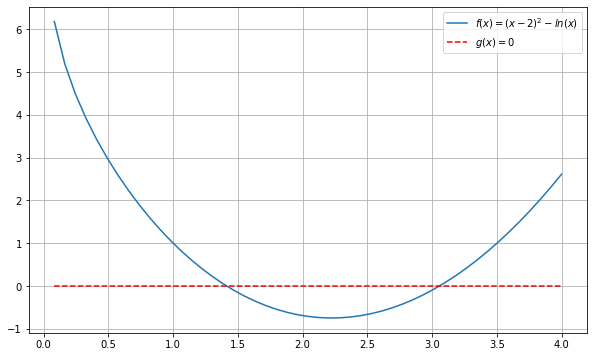

In [ ]:
# Gráficamos para ver el comportamiento de la función
x = np.linspace(0,4); f = lambda x: (x-2)**2 - np.log(x)
y = f(x)
plt.figure(figsize=(10,6)); plt.grid()
plt.plot(x,y, label="$f(x)=(x-2)^2 - ln(x)$"); plt.plot(x,y*0, "r--", label="$g(x)=0$")
plt.legend()
plt.show()

Debido a que $f(x)=(x-2)^2-\ln(x)$ tiene dos raice en el intervalo $[1,3.5]$, según Mathematica los valores de estas raices son: 

$$x_1= 1.41239117202388,\quad x_2=3.05710354999473$$

In [ ]:
f3 = lambda x: (x-2)**2 - np.log(x)
df3= lambda x: 2*(x-2) - 1/x

#Para la raíz en [1,1.5]
rm1=[incremental(f3,1.0,1.5,1e-4)[0],biseccion(f3,1.0,1.5,1e-4)[0],newton(f3,df3,1.0,1.5,1e-4)[0],secante(f3,1.0,1.5,1e-4)[0],ridders(f3,1.0,1.5,1e-4)[0]]
rm2=[incremental(f3,1.0,1.5,1e-4)[1],biseccion(f3,1.0,1.5,1e-4)[1],newton(f3,df3,1.0,1.5,1e-4)[1],secante(f3,1.0,1.5,1e-4)[1],ridders(f3,1.0,1.5,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 1.41239117202388
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,1.41239999999995,4123,0.00062503761348
biseccion,1.41241455078125,13,0.00165526079694
newton,1.41239117202388,4,0.00000000000031
secante,1.43272617796192,2,1.43975736614798
ridders,1.41241454988552,13,0.00165519737736


In [ ]:
#Para la raíz en [3,3.5]
rm1=[incremental(f3,3.0,3.5,1e-4)[0],biseccion(f3,3.0,3.5,1e-4)[0],newton(f3,df3,3.0,3.5,1e-4)[0],secante(f3,3.0,3.5,1e-4)[0],ridders(f3,3.0,3.5,1e-4)[0]]
rm2=[incremental(f3,3.0,3.5,1e-4)[1],biseccion(f3,3.0,3.5,1e-4)[1],newton(f3,df3,3.0,3.5,1e-4)[1],secante(f3,3.0,3.5,1e-4)[1],ridders(f3,3.0,3.5,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 3.05710354999473
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,3.05720000000012,571,0.00315494728306
biseccion,3.05706787109375,13,0.00116708186021
newton,3.05710354999474,4,0.00000000000028
secante,3.04499354375315,2,0.39612679268251
ridders,3.05706787239096,13,0.00116703942760


En este caso el **mejor método** es **Newton** con un error de $3.1×10^{−13}$ y $2.8×10^{−13}$ en solo en cuatro pasos. Esto es porque esta función es derivable y continua justo en los intervalos de las raices, sin embargo no esta definida en valores negativos y el cero.

El **peor método** sería **Incremental** ya que necesita 571 pasos para un error de $3.15×10^{−3}$ en el mejor caso, lo cual es bastante costoso en términos de tiempo de computo.

iv) $f(x)=x^{3}-3x+2$

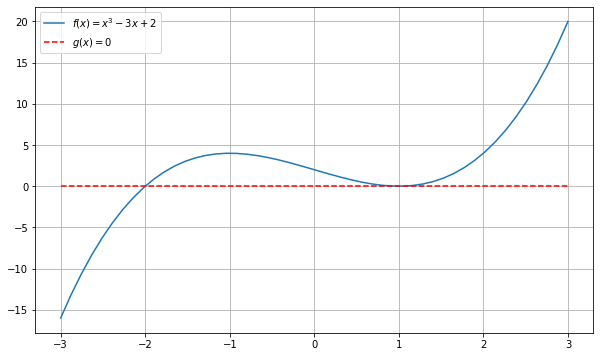

In [ ]:
x = np.linspace(-3.0,3.0); f = lambda x: x**3-3*x+2
y = f(x)
plt.figure(figsize=(10,6)); plt.grid()
plt.plot(x,y, label="$f(x)=x^{3}-3x+2$"); plt.plot(x,y*0, "r--", label="$g(x)=0$")
plt.legend()
plt.show()

$f(x)=x^{3}-3x+2$ analíticamente, tiene solamente dos raíces: $x_1=-2$ y $x_2=1$. 


In [ ]:
f4 = lambda x: x**3-3*x+2
df4= lambda x: 3*x**2-3

In [ ]:
#Para la raíz en [-2.2,-1.9]
rm1=[incremental(f4,-2.2,-1.9,1e-4)[0],biseccion(f4,-2.2,-1.9,1e-4)[0],newton(f4,df4,-2.2,-1.9,1e-4)[0],secante(f4,-2.2,-1.9,1e-4)[0],ridders(f4,-2.2,-1.9,1e-4)[0]]
rm2=[incremental(f4,-2.2,-1.9,1e-4)[1],biseccion(f4,-2.2,-1.9,1e-4)[1],newton(f4,df4,-2.2,-1.9,1e-4)[1],secante(f4,-2.2,-1.9,1e-4)[1],ridders(f4,-2.2,-1.9,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= -2 
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,-1.99999999999958,1999,0.00000000002108
biseccion,-1.99997558593750,12,0.00122070312500
newton,-2.00000000000187,3,0.00000000009375
secante,-1.98733125649013,2,0.63343717549326
ridders,-1.99997559130183,12,0.00122043490848


Realizaremos el análisis comparativo en terminos de dos cosas, numero de pasos y error.

En términos de **numero de pasos** el mejor método fue el de la **secante** pues en solamente dos iteraciones, nos presenta un resultado con un error relativamente bajo y el peor método fue el metodo **incremental**, pues aunque presenta un error muy, pero muy pequeño, llega a este en 1999 pasos, haciéndolo muy caro en términos computacionales.

En términos de **error** notamos que el mejor método fue el **incremental** pues presenta el error más pequeño de todos y el peor método fue el método de la **secante** pues presenta un el error más grande de todos, aunque solo convergió a dicho resultado en solamente dos pasos.

Concluyo que para la raíz $x_1=-2$ de la función $f(x)=x^{3}-3x+2$, el mejor método fue el de **Newton** por su relativo bajo costo computacional(solo realiza 3 iteraciones) y error decente.

In [ ]:
#Para la raíz en [0.8,1.1]
rm1=[incremental(f4,0.8,1.1,1e-4)[0],biseccion(f4,0.8,1.1,1e-4)[0],newton(f4,df4,0.8,1.1,1e-4)[0],secante(f4,0.8,1.1,1e-4)[0],ridders(f4,0.8,1.1,1e-4)[0]]
rm2=[incremental(f4,0.8,1.1,1e-4)[1],biseccion(f4,0.8,1.1,1e-4)[1],newton(f4,df4,0.8,1.1,1e-4)[1],secante(f4,0.8,1.1,1e-4)[1],ridders(f4,0.8,1.1,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 1
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,0.99999999999998,1999,0.00000000000220
biseccion,1.09992675781250,12,9.99267578125000
newton,0.99990397752286,9,0.00960224771388
secante,1.01197215929553,7,1.19721592955335
ridders,1.09992600206243,12,9.99260020624284


Realizaremos el análisis comparativo en terminos de dos cosas, numero de pasos y error.

En términos de **numero de pasos** el mejor método fue el de la **secante** pues en siete iteraciones, nos presenta un resultado con un error relativamente bajo y el peor método fue el metodo **incremental**, pues aunque presenta un error muy, pero muy pequeño, llega a este en 1999 pasos, haciéndolo muy caro en términos computacionales.

En términos de **error** notamos que el mejor método fue el **incremental** pues presenta el error más pequeño de todos y el peor método fue el método de la **Bisección** pues presenta el error más grande de todos.

Concluyo que para la raíz $x_2=1$ de la función $f(x)=x^{3}-3x+2$, el mejor método fue el de **Newton** por su relativo bajo costo computacional(solo realiza 9 iteraciones) y presenta un error pequeño.

v) $f(x)=x^{1/3}$

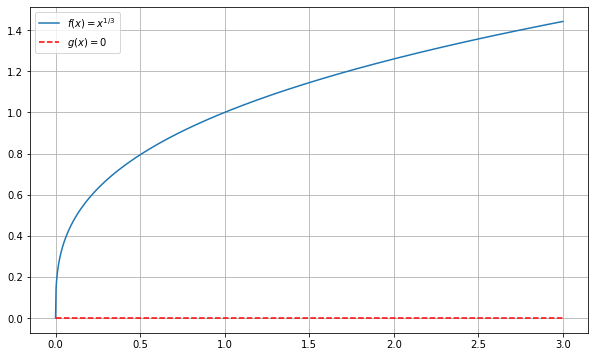

In [ ]:
# Gráficamos para ver el comportamiento de la función
x = np.linspace(-0,3,1000); f = lambda x: (x)**(1/3)
y = f(x)
plt.figure(figsize=(10,6)); plt.grid()
plt.plot(x,y, label="$f(x)=x^{1/3}$"); plt.plot(x,y*0, "r--", label="$g(x)=0$")
plt.legend()
plt.show()

$f(x)=x^{1/3}$ tiene una raíz analitica en $0$

In [ ]:
f5 = lambda x: (x)**(1/3)
df5= lambda x: (1/3)*(x**(-2/3))

#Para la raíz en [0,0.5]
rm1=[incremental(f5,0.0,0.5,1e-4)[0],biseccion(f5,0.0,0.5,1e-4)[0],newton(f5,df5,0.0,0.5,1e-4)[0],secante(f5,0.0,0.5,1e-4)[0]]
rm2=[incremental(f5,0.0,0.5,1e-4)[1],biseccion(f5,0.0,0.5,1e-4)[1],newton(f5,df5,0.0,0.5,1e-4)[1],secante(f5,0.0,0.5,1e-4)[1]]
# rm3=[incremental(f4,0.8,1.1,1e-4)[1],biseccion(f4,0.8,1.1,1e-4)[1],newton(f4,df4,0.8,1.1,1e-4)[1],secante(f4,0.8,1.1,1e-4)[1],ridders(f4,0.8,1.1,1e-4)[1]]

nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 0
for i in range(len(rm1)):
  error=abs(valor_real-rm1[i])
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm[:-1], columns=cols)

,Raiz,Pasos,error %
incremental,0.00010000000000+0.00000000000000j,0,0.00010000000000
biseccion,0.49993896484375+0.00000000000000j,13,0.49993896484375
newton,26787715178890905004250371415952550230987877101...,1000,26787715178890905004250371415952550230987877101...
secante,0.00000000000000+0.00000000000000j,0,0.00000000000000


Puesto que esta función no es continua en valores negativos ni derivable en negativos más el cero, podemos decir que los peores métodos son Newton, secante y Readers porque no se pueden usar en este caso.

Dado que este solo lo podemos aproximar por fuerza bruta, el mejor método es el Incremental.

vii) $f(x)=x-\cos x=0$ en $(0,\frac{\pi}{2})$

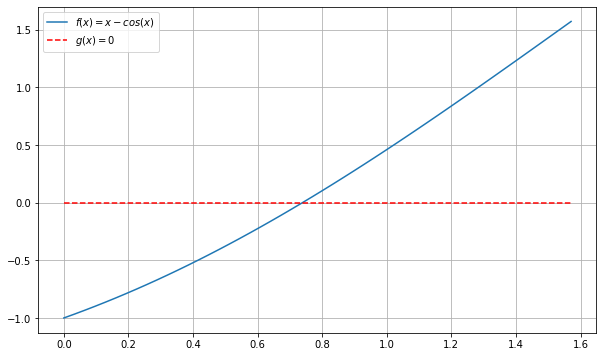

In [ ]:
# Gráficamos para ver el comportamiento de la función
x = np.linspace(0,np.pi/2); f = lambda x: x - np.cos(x)
y = f(x)
plt.figure(figsize=(10,6)); plt.grid()
plt.plot(x,y, label="$f(x)=x-cos(x)$"); plt.plot(x,y*0, "r--", label="$g(x)=0$")
plt.legend()
plt.show()

Por inspección en la gráfica podemos ver que hay una raíz en el intervalo $[0,1]$, en Mathematica se calculó en valor de la raíz que es la siguiente.

$$x=0.73908513321516$$

In [ ]:
f7 = lambda x: x - np.cos(x)
df7= lambda x: 1 + np.sin(x)

#Para la raíz en [0,1]
rm1=[incremental(f7,0.0,1.0,1e-4)[0],biseccion(f7,0.0,1.0,1e-4)[0],newton(f7,df7,0.0,1.0,1e-4)[1],secante(f7,0.0,1.0,1e-4)[0],ridders(f7,0.0,1.0,1e-4)[0]]
rm2=[incremental(f7,0.0,1.0,1e-4)[1],biseccion(f7,0.0,1.0,1e-4)[1],newton(f7,df7,0.0,1.0,1e-4)[1],secante(f7,0.0,1.0,1e-4)[1],ridders(f7,0.0,1.0,1e-4)[1]]

nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 0.73908513321516
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,0.73909999999993,7390,0.00201151181465
biseccion,0.73907470703125,14,0.00141068781409
newton,3.00000000000000,3,305.90723113985973
secante,0.68507335732605,2,7.30792346669909
ridders,0.73907470738626,14,0.00141063978066


En este caso, el peor método es el de Newton ya que estamos trabajando con funciones periodicas.

Y el mejor método sería el de Ridders o de bisección.

viii) $f(x)=\cos(x)-x^{3}$ con un valor inicial en $x_0=0.5$

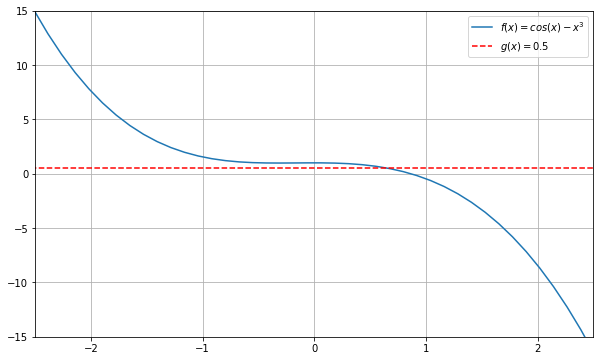

In [ ]:
x = np.linspace(-3.0,3.0); f = lambda x: np.cos(x)-x**3
y = f(x)
plt.figure(figsize=(10,6)); plt.grid()
plt.plot(x,y, label="$f(x)=cos(x)-x^{3}$"); plt.plot(x,y*0+0.5, "r--", label="$g(x)=0.5$")
plt.legend(); plt.ylim(-15,15); plt.xlim(-2.5,2.5)
plt.show()

Para el valor inicial $x_0=0.5$, tenemos la ecuación: $\cos(x)-x^3=0.0$ la ecuación tiene solución en $x=0.86547403310161444662$ y no tamos que está en el intervalo [0.5,0.9].

In [ ]:
f8 = lambda x: np.cos(x)-x**3
df8= lambda x: -np.sin(x)-3*x**2

In [ ]:
#Para la raíz en [0.7,0.9]
rm1=[incremental(f8,0.7,0.9,1e-4)[0],biseccion(f8,0.7,0.9,1e-4)[0],newton(f8,df8,0.7,0.9,1e-4)[0],secante(f8,0.7,0.9,1e-4)[0],ridders(f8,0.7,0.9,1e-4)[0]]
rm2=[incremental(f8,0.7,0.9,1e-4)[1],biseccion(f8,0.7,0.9,1e-4)[1],newton(f8,df8,0.7,0.9,1e-4)[1],secante(f8,0.7,0.9,1e-4)[1],ridders(f8,0.7,0.9,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 0.86547403310161444662
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,0.86549999999998,1654,0.00300030935351
biseccion,0.86552734375000,11,0.00615970512652
newton,0.86547403349260,3,0.00000004517629
secante,0.85941666895132,2,0.69988976198276
ridders,0.86552733852879,11,0.00615910184952


Realizaremos el análisis comparativo en terminos de dos cosas, numero de pasos y error.

En términos de **numero de pasos** el mejor método fue el de la **secante** pues en dos iteraciones,converge a un resultado y el peor método fue el metodo **incremental**, pues aunque presenta un error pequeño, llega a este en 1654 pasos, haciéndolo muy caro en términos computacionales.

En términos de **error** notamos que el mejor método fue el de **Newton-Rapson** pues presenta el error más pequeño de todos y el peor método fue el método de la **secante** pues presenta el error más grande de todos.

Concluyo que para la raíz $x=0.86547403310161444662$ de la función $f(x)=\cos(x)-x^{3}$, el mejor método fue el de **Newton** por su relativo bajo costo computacional(solo realiza 3 iteraciones) y presenta un error pequeño.

ix) $f(x)=\tan(\pi x)-6=0$ en $(0,1)$

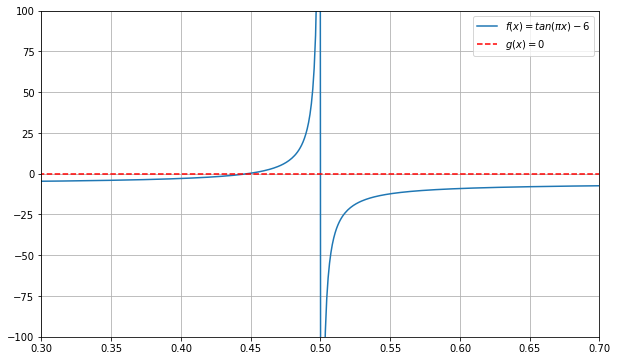

In [ ]:
# Gráficamos para ver el comportamiento de la función
x = np.linspace(0,1,1000); f = lambda x: np.tan(np.pi*x) -6
y = f(x)
plt.figure(figsize=(10,6)); plt.grid()
plt.plot(x,y, label="$f(x)=tan(\pi x) - 6$"); plt.plot(x,y*0, "r--", label="$g(x)=0$")
plt.legend(); plt.ylim((-100, 100)); plt.xlim((0.3, 0.7))
plt.show()

De manera visual, se puede aproximar la raíz dentro del intervalo $[0.4,0.6]$. Según Mathematica, el valor númerico de la raiz es

$$x=0.447431542821239$$

Para evitar la parte donde no es continua la función evaluamos en el intervalo $[0.4,0.49]$.

In [ ]:
f9 = lambda x: np.tan(np.pi*x)-6
df9= lambda x: np.pi/(np.cos(np.pi*x)**2)

#Para la raíz en [0.4,0.5]
rm1=[incremental(f9,0.4,0.49,1e-6)[0],biseccion(f9,0.4,0.49,1e-6)[0],newton(f9,df9,0.4,0.49,1e-6)[0],secante(f9,0.4,0.49,1e-6)[0],ridders(f9,0.4,0.49,1e-6)[0]]
rm2=[incremental(f9,0.4,0.49,1e-6)[1],biseccion(f9,0.4,0.49,1e-6)[1],newton(f9,df9,0.4,0.49,1e-6)[1],secante(f9,0.4,0.49,1e-6)[1],ridders(f9,0.4,0.49,1e-6)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 0.447431542821239
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,0.44743199999873,47431,0.00010217819895
biseccion,0.44743141174316,17,0.00002929567149
newton,0.44743154328978,3,0.00000010471708
secante,0.44730412112167,8,0.02847847935850
ridders,0.44743115830024,17,0.00008593962655


En este caso, el mejor es el método de Newton ya que tiene el error más pequeño. Y el peor método sería el método de la secante ya que su error es mucho más grande.

Todo esto se hizo con la consideración de evitar la discontinuidad de la función, en dicho caso el mejor método sería el Incremental.

x) $f(x)=\frac{1}{(x-0.3)^2+0.01}+\frac{1}{(x-0.8)^2+0.04}$

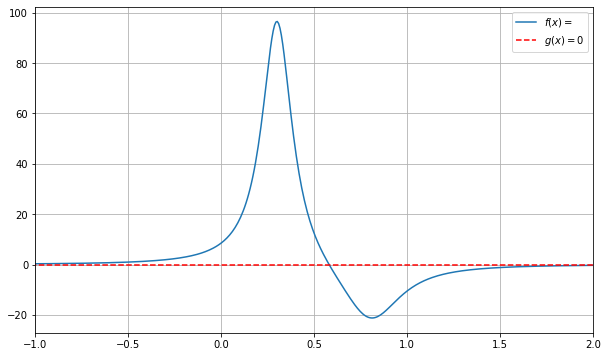

In [ ]:
x = np.linspace(-2.3,5,1000); f = lambda x: 1/((x-0.3)**2+0.01)-1/((x-0.8)**2+0.04)
y = f(x)
plt.figure(figsize=(10,6)); plt.grid()
plt.plot(x,y, label="$f(x)=\frac{1}{(x-0.3)^2+0.01}+\frac{1}{(x-0.8)^2+0.04}$"); plt.plot(x,y*0, "r--", label="$g(x)=0$")
plt.legend(); plt.xlim(-1,2);
plt.show()

$f(x)=\frac{1}{(x-0.3)^2+0.01}+\frac{1}{(x-0.8)^2+0.04}$ tiene solución en $x=\frac{29}{50}$

In [ ]:
f10 = lambda x: 1/((x-0.3)**2+0.01)-1/((x-0.8)**2+0.04)
df10= lambda x: ((2*(-0.8+x))/(0.04+(x-0.8)**2)**2)-((2*(x-0.3))/(0.01+(x-0.3)**2)**2)

In [ ]:
#Para la raíz en [0.5,0.9]
rm1=[incremental(f10,0.5,0.6,1e-4)[0],biseccion(f10,0.5,0.6,1e-4)[0],newton(f10,df10,0.5,0.6,1e-4)[0],secante(f10,0.5,0.6,1e-4)[0],ridders(f10,0.5,0.6,1e-4)[0]]
rm2=[incremental(f10,0.5,0.6,1e-4)[1],biseccion(f10,0.5,0.6,1e-4)[1],newton(f10,df10,0.5,0.6,1e-4)[1],secante(f10,0.5,0.6,1e-4)[1],ridders(f10,0.5,0.6,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 0.58
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,0.58009999999999,800,0.01724137930883
biseccion,0.57998046875000,10,0.00336745689657
newton,0.57999999997748,3,0.00000000388243
secante,0.58311688311688,2,0.53739364084193
ridders,0.57994494221153,10,0.00949272215041


Realizaremos el análisis comparativo en terminos de dos cosas, numero de pasos y error.

En términos de **numero de pasos** el mejor método fue el de la **secante** pues en dos iteraciones,converge a un resultado y el peor método fue el metodo **incremental**, pues aunque presenta un error pequeño, llega a este en 800 pasos, haciéndolo muy caro en términos computacionales.

En términos de **error** notamos que el mejor método fue el de **Newton-Rapson** pues presenta el error más pequeño de todos y el peor método fue el método de la **secante** pues presenta el error más grande de todos.

Concluyo que para la raíz $x=0.58$ de la función $f(x)=\frac{1}{(x-0.3)^2+0.01}+\frac{1}{(x-0.8)^2+0.04}$, el mejor método fue el de **Newton** por su relativo bajo costo computacional(solo realiza 3 iteraciones) y presenta un error pequeño.

xi) $f(x)=x^4-(6.4)x^3+(6.45)x^2+(20.538)x-31.752$

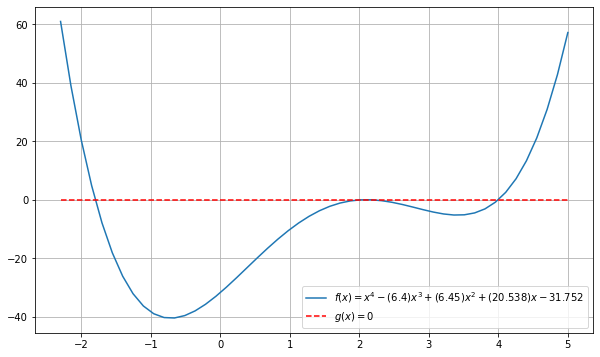

In [ ]:
# Gráficamos para ver el comportamiento de la función
x = np.linspace(-2.3,5); f = lambda x: x**4-(6.4)*x**3+(6.45)*x**2+(20.538)*x-31.752
y = f(x)
plt.figure(figsize=(10,6)); plt.grid()
plt.plot(x,y, label="$f(x)=x^4-(6.4)x^3+(6.45)x^2+(20.538)x-31.752$"); plt.plot(x,y*0, "r--", label="$g(x)=0$")
plt.legend()
plt.show()

En esta ecuación tenemos tres raices diferentes

$$x_1=-1.8,\quad x_2=2.1,\quad x_3=4$$

In [ ]:
f11 = lambda x: x**4-(6.4)*x**3+(6.45)*x**2+(20.538)*x-31.752
df11= lambda x: 4*x**3-(19.2)*x**2+(12.9)*x+(20.538)

#Para la raíz en [-2,-1]
rm1=[incremental(f11,-2.0,-1.0,1e-4)[0],biseccion(f11,-2.0,-1.0,1e-4)[0],newton(f11,df11,-2.0,-1.0,1e-4)[0],secante(f11,-2.0,-1.0,1e-4)[0],ridders(f11,-2.0,-1.0,1e-4)[0]]
rm2=[incremental(f11,-2.0,-1.0,1e-4)[1],biseccion(f11,-2.0,-1.0,1e-4)[1],newton(f11,df11,-2.0,-1.0,1e-4)[1],secante(f11,-2.0,-1.0,1e-4)[1],ridders(f11,-2.0,-1.0,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= -1.8
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,-1.79990000000002,2000,0.00555555555433
biseccion,-1.79998779296875,14,0.00067816840278
newton,-1.80000000014458,4,0.00000000803217
secante,-1.79881678639898,5,0.06573408894576
ridders,-1.79991253521145,12,0.00485915491931


In [ ]:
#Para la raíz en [1.5,2.5]
rm1=[incremental(f11,1.5,2.5,1e-4)[0],biseccion(f11,1.5,2.5,1e-4)[0],newton(f11,df11,1.5,2.5,1e-4)[0],secante(f11,1.5,2.5,1e-4)[0],ridders(f11,1.5,2.5,1e-4)[0]]
rm2=[incremental(f11,1.5,2.5,1e-4)[1],biseccion(f11,1.5,2.5,1e-4)[1],newton(f11,df11,1.5,2.5,1e-4)[1],secante(f11,1.5,2.5,1e-4)[1],ridders(f11,1.5,2.5,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 2.1
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,2.50000000000100,9999,19.04761904766667
biseccion,2.49993896484375,14,19.04471261160714
newton,2.09994995213784,11,0.00238323153123
secante,2.10788974840329,10,0.37570230491851
ridders,2.49991661113092,14,19.04364814909125


In [ ]:
#Para la raíz en [3.5,4.5]
rm1=[incremental(f11,3.5,4.5,1e-4)[0],biseccion(f11,3.5,4.5,1e-4)[0],newton(f11,df11,3.5,4.5,1e-4)[0],secante(f11,3.5,4.5,1e-4)[0],ridders(f11,3.5,4.5,1e-4)[0]]
rm2=[incremental(f11,3.5,4.5,1e-4)[1],biseccion(f11,3.5,4.5,1e-4)[1],newton(f11,df11,3.5,4.5,1e-4)[1],secante(f11,3.5,4.5,1e-4)[1],ridders(f11,3.5,4.5,1e-4)[1]]
nm=['incremental','biseccion','newton','secante','ridders']

lista_incremental=[]
valor_real= 4
for i in range(len(rm1)):
  error=abs((valor_real-rm1[i])/valor_real)*100
  lista_incremental.append([rm1[i],int(rm2[i]),error])
cols = ["Raiz","Pasos","error %"]
pd.DataFrame(lista_incremental, index=nm, columns=cols)

,Raiz,Pasos,error %
incremental,4.00000000000106,4999,0.00000000002638
biseccion,4.00006103515625,14,0.00152587890625
newton,4.00000000000000,1,0.00000000000002
secante,3.99896378062332,6,0.02590548441703
ridders,4.00000780512692,15,0.00019512817306


En el calculo para estas tres raíces, el mejor método fue el de Newton ya que estaba bien definida la función en este intervalo y tambien tuvo el menor número de paso.

El peor fue el Incremental ya que no sabía como encontrar una raices que era máximo local con $f(x_2)=0$, por lo que no habia región negativa.

#### En conclusión...

...se tiene que en la gran mayoría de los casos, el método de **Newton-Rapson**, presenta resultados con un error relativamente bajo y en un numero de pasos "aceptable" que podría representar un término medio entre los cinco métodos que se presentan y que se analizaron.

Si se busca un resultado con un error mucho más bajo (mas preciso), recomendamos el método **incremental**, bajo el costo de que realiza muchas iteraciones para llegar al resultado, ie, tarda más en converger.

Si se busca un metodo que converga más rapido a una solución, recomendamos entre el método de **Newton-Rapson** y el método de la **secante** pues convergen a un resultado en un numero pequeño de pasos.

También estamos concientes de que para hacer esto una competencia mucho más justa, recomendamos que en el momento de evaluar los métodos en alguna función, se escoja la misma tolerancia (o parámetros afines) para los métodos, se escojan funciones derivables y continuas en el intervalo donde se desea encontrar la raíz y que el intervalo sea relativamente pequeño pues la eficiencia de métodos como el **incremental** dependen enteramente de parámetros como la tolerancia y el tamaño del intervalo.